# Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Data/fake_job_postings.csv')

In [3]:
df.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Dimensions
df.shape

(17880, 18)

This data set has 17880 rows, 18 columns.

- job_id
- title
- location
- department
- salary_range
- company_profile
- description
- requirements
- benefit
- telecommuting
- has_company_logo
- has_question
- employment_type
- required_experience
- required_education
- industry
- function
- fraudulent

In [6]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

There are 800 fake job posts in the dataset. Most of the data is catgorical/textual data.

In [7]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [8]:
df.describe()

job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [9]:
df.corr(numeric_only=True)

job_id  telecommuting  has_company_logo  has_questions  \
job_id            1.000000      -0.004559         -0.014539      -0.087025   
telecommuting    -0.004559       1.000000         -0.019836       0.020345   
has_company_logo -0.014539      -0.019836          1.000000       0.233932   
has_questions    -0.087025       0.020345          0.233932       1.000000   
fraudulent        0.079872       0.034523         -0.261971      -0.091627   

                  fraudulent  
job_id              0.079872  
telecommuting       0.034523  
has_company_logo   -0.261971  
has_questions      -0.091627  
fraudulent          1.000000

# Dealing with missing values

In [10]:
# Check for missing values
df.isnull().sum()


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
# Percentage of missing values by column
df.isnull().sum() / df.shape[0] * 100


job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [12]:
# Drop location, job id, and salary range - they are either unnecessary or have too many missing values

df.drop(columns=['job_id', 'location', 'salary_range'], inplace=True)

Columns with highest percentage of missing values:
- Department
- Salary Range 
- Benefits
- Required Education
- Required Experience



In [13]:
df.head()

title department  \
0                           Marketing Intern  Marketing   
1  Customer Service - Cloud Video Production    Success   
2    Commissioning Machinery Assistant (CMA)        NaN   
3          Account Executive - Washington DC      Sales   
4                        Bill Review Manager        NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [14]:
# Replace missing values in categorical columns with empty strings
columns_with_text = ['title', 'department', 'company_profile', 'description', 'requirements',
       'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function']
df[columns_with_text] = df[columns_with_text].replace(np.nan, '')
df.isnull().sum()


title                  0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [15]:
df.head()

title department  \
0                           Marketing Intern  Marketing   
1  Customer Service - Cloud Video Production    Success   
2    Commissioning Machinery Assistant (CMA)              
3          Account Executive - Washington DC      Sales   
4                        Bill Review Manager              

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                                 0   
1  What you will get from usThrough being part of...              0   
2                                                                 0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0                                       
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                                                           Marketing   
1                     Marketing and Advertising      Customer Service   
2                                                                       
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   department           17880 non-null  object
 2   company_profile      17880 non-null  object
 3   description          17880 non-null  object
 4   requirements         17880 non-null  object
 5   benefits             17880 non-null  object
 6   telecommuting        17880 non-null  int64 
 7   has_company_logo     17880 non-null  int64 
 8   has_questions        17880 non-null  int64 
 9   employment_type      17880 non-null  object
 10  required_experience  17880 non-null  object
 11  required_education   17880 non-null  object
 12  industry             17880 non-null  object
 13  function             17880 non-null  object
 14  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.0+ MB


# Exploring Fradulent Job Postings

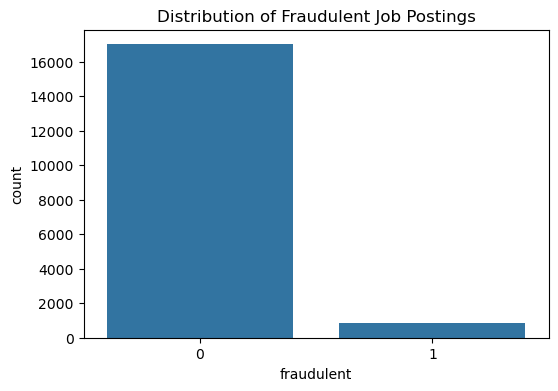

In [17]:

plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent Job Postings')
plt.show()

We'll be working with class imbalance

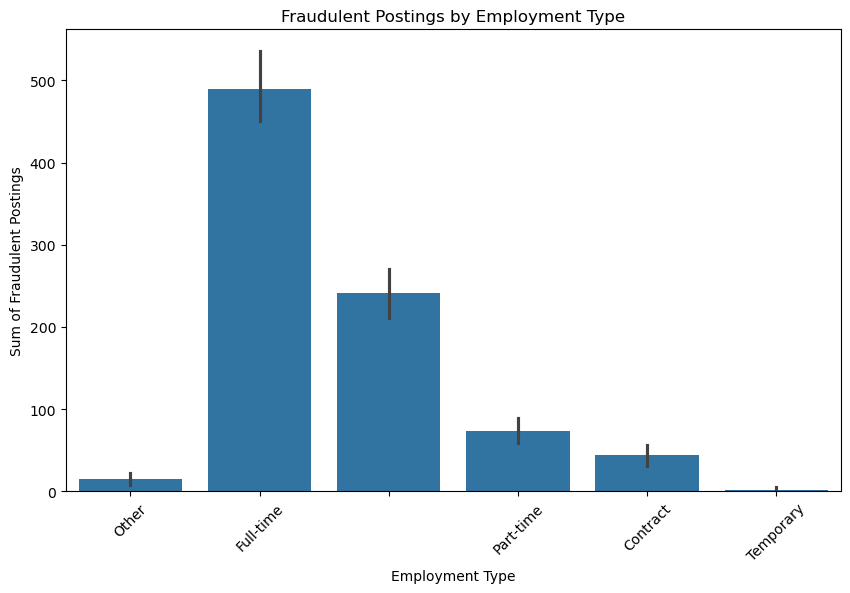

<Figure size 640x480 with 0 Axes>

In [18]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='employment_type', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()
plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Fraud_Emp_Type.png')

Most fraudulent job postings are listed as full-time jobs.

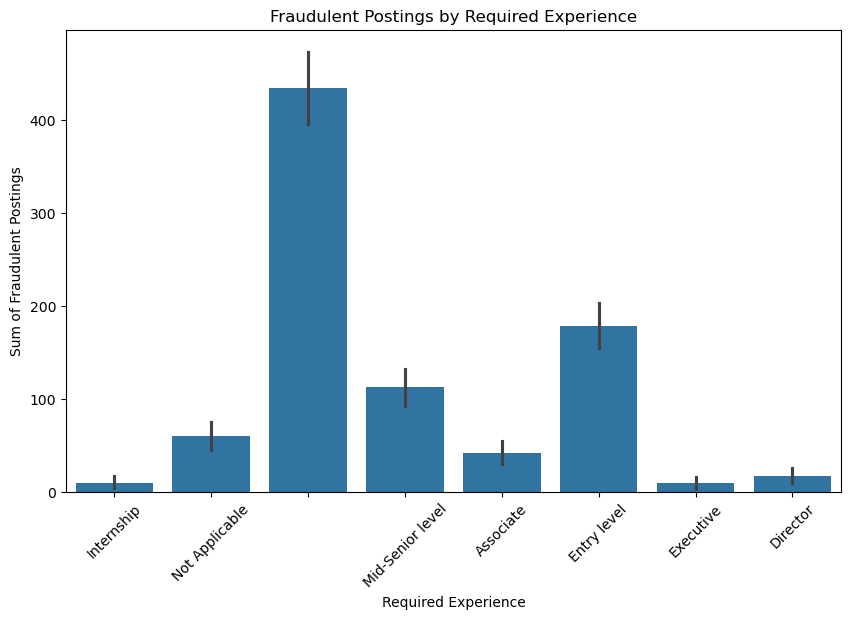

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='required_experience', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()
plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Fraud_Req_Exp.png')

Most fraudulent job postings don't specify the required experience or target entry-level candidates.

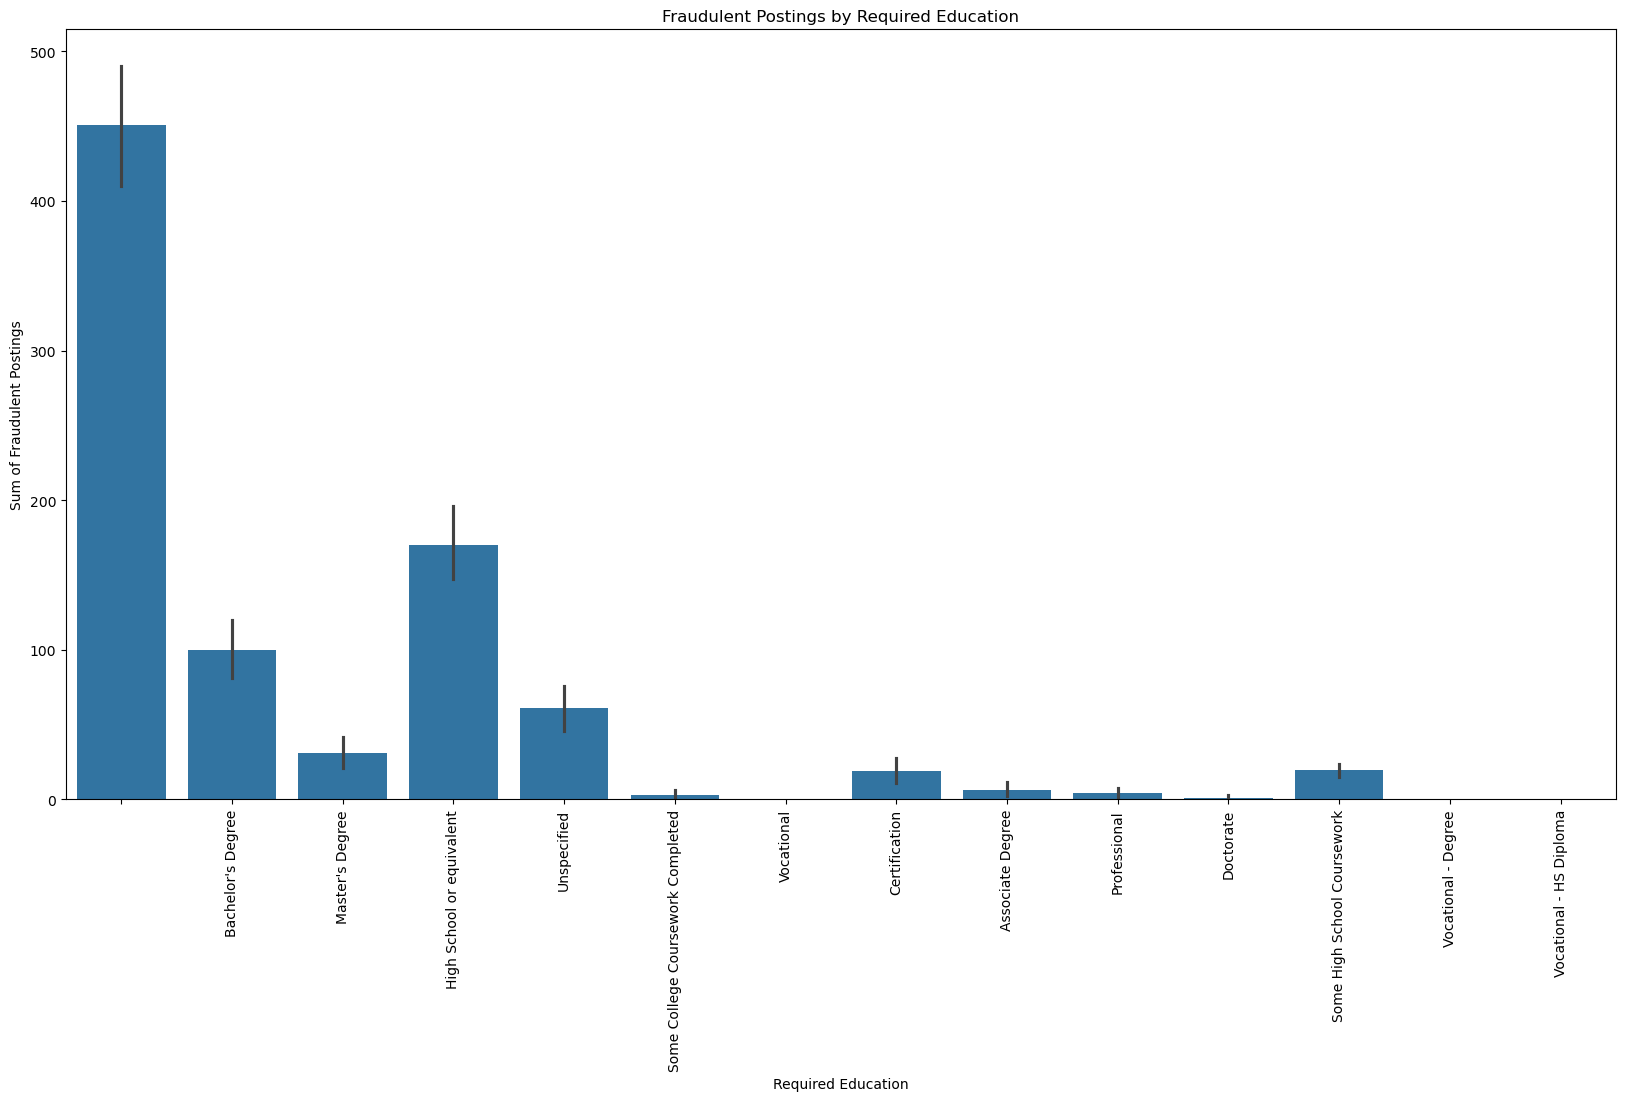

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='required_education', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Required Education')
plt.xlabel('Required Education')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation = 90)
plt.show()
plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Fraud_Req_Educ.png')

Most fraudulent job postings don't specify the required education or target candidates with a high school diploma or GED.

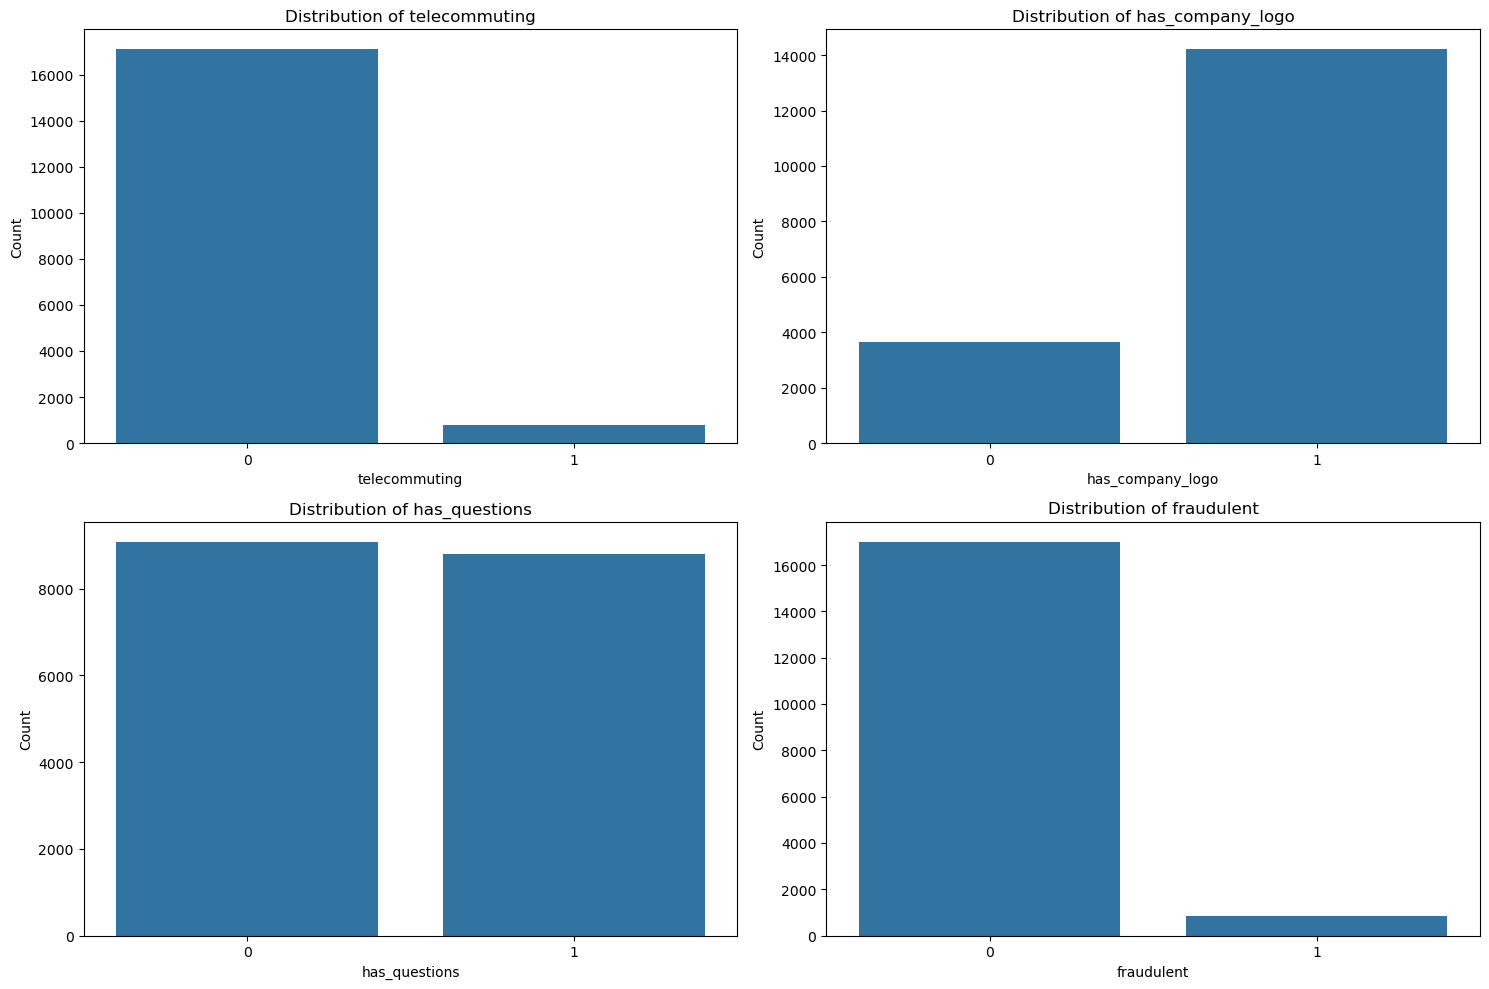

In [21]:
numerical_cols = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

# Explore distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

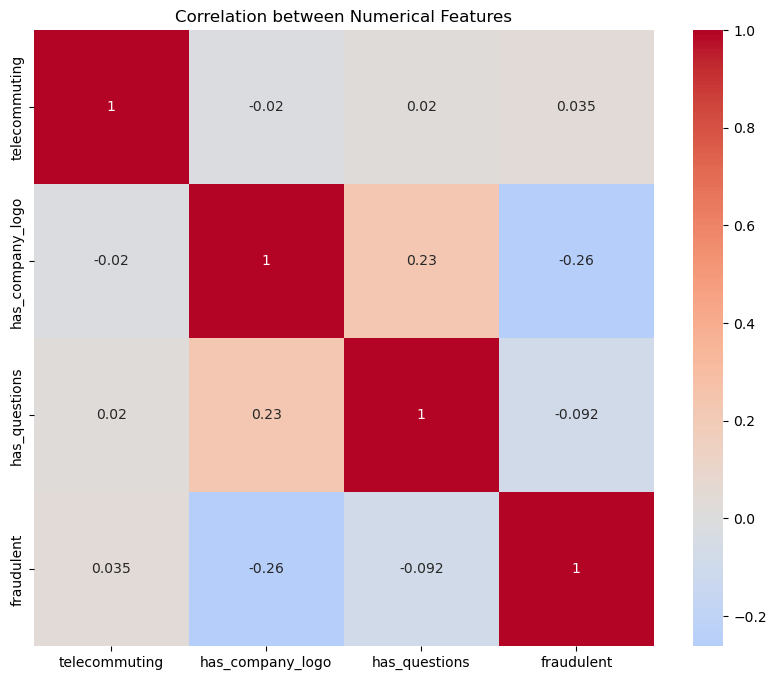

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Correlation between Numerical Features')
plt.show()

Low correlations between the numerical features and target

In [23]:
# Explore what fraudulent job postings descriptions look like
df[df['fraudulent'] == True]['description'].iloc[0]


'IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities:\xa0Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies saf

In [24]:
df[df['fraudulent'] == True]['description'].iloc[100]


'We are a full-service marketing and staffing firm, serving companies ranging from Fortune 100 to new start-up organizations. We work with job seekers in an equally broad range, from light industrial temporary workers to executive level candidates.Are you looking for a Work from Home Opportunity where you can earn up to $2500 and more per week? Our Online Service Representative position would be perfect for you!- Set your own hours - Make money every time you decide to work - Work remotely from home - Get paid weekly - If you have a computer with internet, this is for you'

# Cleaning the Data - Text Preprocessing

In [25]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4') 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sabrinasayed/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sabrinasayed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sabrinasayed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sabrinasayed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sabrinasayed/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    return ' '.join(tokens)


In [27]:

# Apply preprocessing to relevant text columns
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for column in text_columns:
    df[f'{column}_processed'] = df[column].apply(preprocess_text)

df.head()

title department  \
0                           Marketing Intern  Marketing   
1  Customer Service - Cloud Video Production    Success   
2    Commissioning Machinery Assistant (CMA)              
3          Account Executive - Washington DC      Sales   
4                        Bill Review Manager              

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                                 0   
1  What you will get from usThrough being part of...              0   
2                                                                 0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0                                       
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                                                           Marketing   
1                     Marketing and Advertising      Customer Service   
2                                                                       
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent                          title_processed  \
0           0                         marketing intern   
1           0  customer service cloud video production   
2           0    commissioning machinery assistant cma   
3           0          account executive washington dc   
4           0                      bill review manager   

                           company_profile_processed  \
0  food created groundbreaking award winning cook...   
1  second world cloud video production service se...   
2  valor service provides workforce solution meet...   
3  passion improving quality life geography heart...   
4  spotsource solution llc global human capital m...   

                               description_processed  \
0  food fast growing james beard award winning on...   
1  organised focused vibrant awesome passion cust...   
2  client located houston actively seeking experi...   
3  company esri environmental system research ins...   
4  job title itemization review managerlocation f...   

                              requirements_processed  \
0  experience content management system major plu...   
1  expect key responsibility communicate client s...   
2  implement pre commissioning commissioning proc...   
3  education bachelor master gi business administ...   
4  qualification rn license state texasdiploma ba...   

  

In [28]:
df['description_processed'].iloc[0]

'food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various content management systemsresearching blog website provision food affiliate programassisting day day affiliate program support screening affiliate assisting affiliate inquiriessupporting pr amp event neededhelping office administrative work filing mailing preparing meetingsworking developer document bug suggest improvement sitesupporting marketing executive staff'

In [29]:
df['requirements_processed'].iloc[10]

'position url_fdaaebceedefdcefecbafedd developerjob location united state new jersey jersey cityus work status required ead green card u citizen detailed description url_fdaaebceedefdcefecbafedd developer strong sql amp vb net working highly effective software development team responsible development enhancement idb reporting billing system work effort performed according policy procedure relating software development quality background developer year development experience using url_fdaaebceedefdcefecbafedd vb net including year sql development required college degree experience building web based application using url_fdaaebceedefdcefecbafedd sql server expert level hand experience writing sql server stored procedure proficient m office product excel access word outlook worked role involved creation report internal management external customer experience developing another scripting front end language excellent communication skillsif interested please send updated profile email_dfbff

# Exploring Textual data

Create a world cloud for real and fake job postings

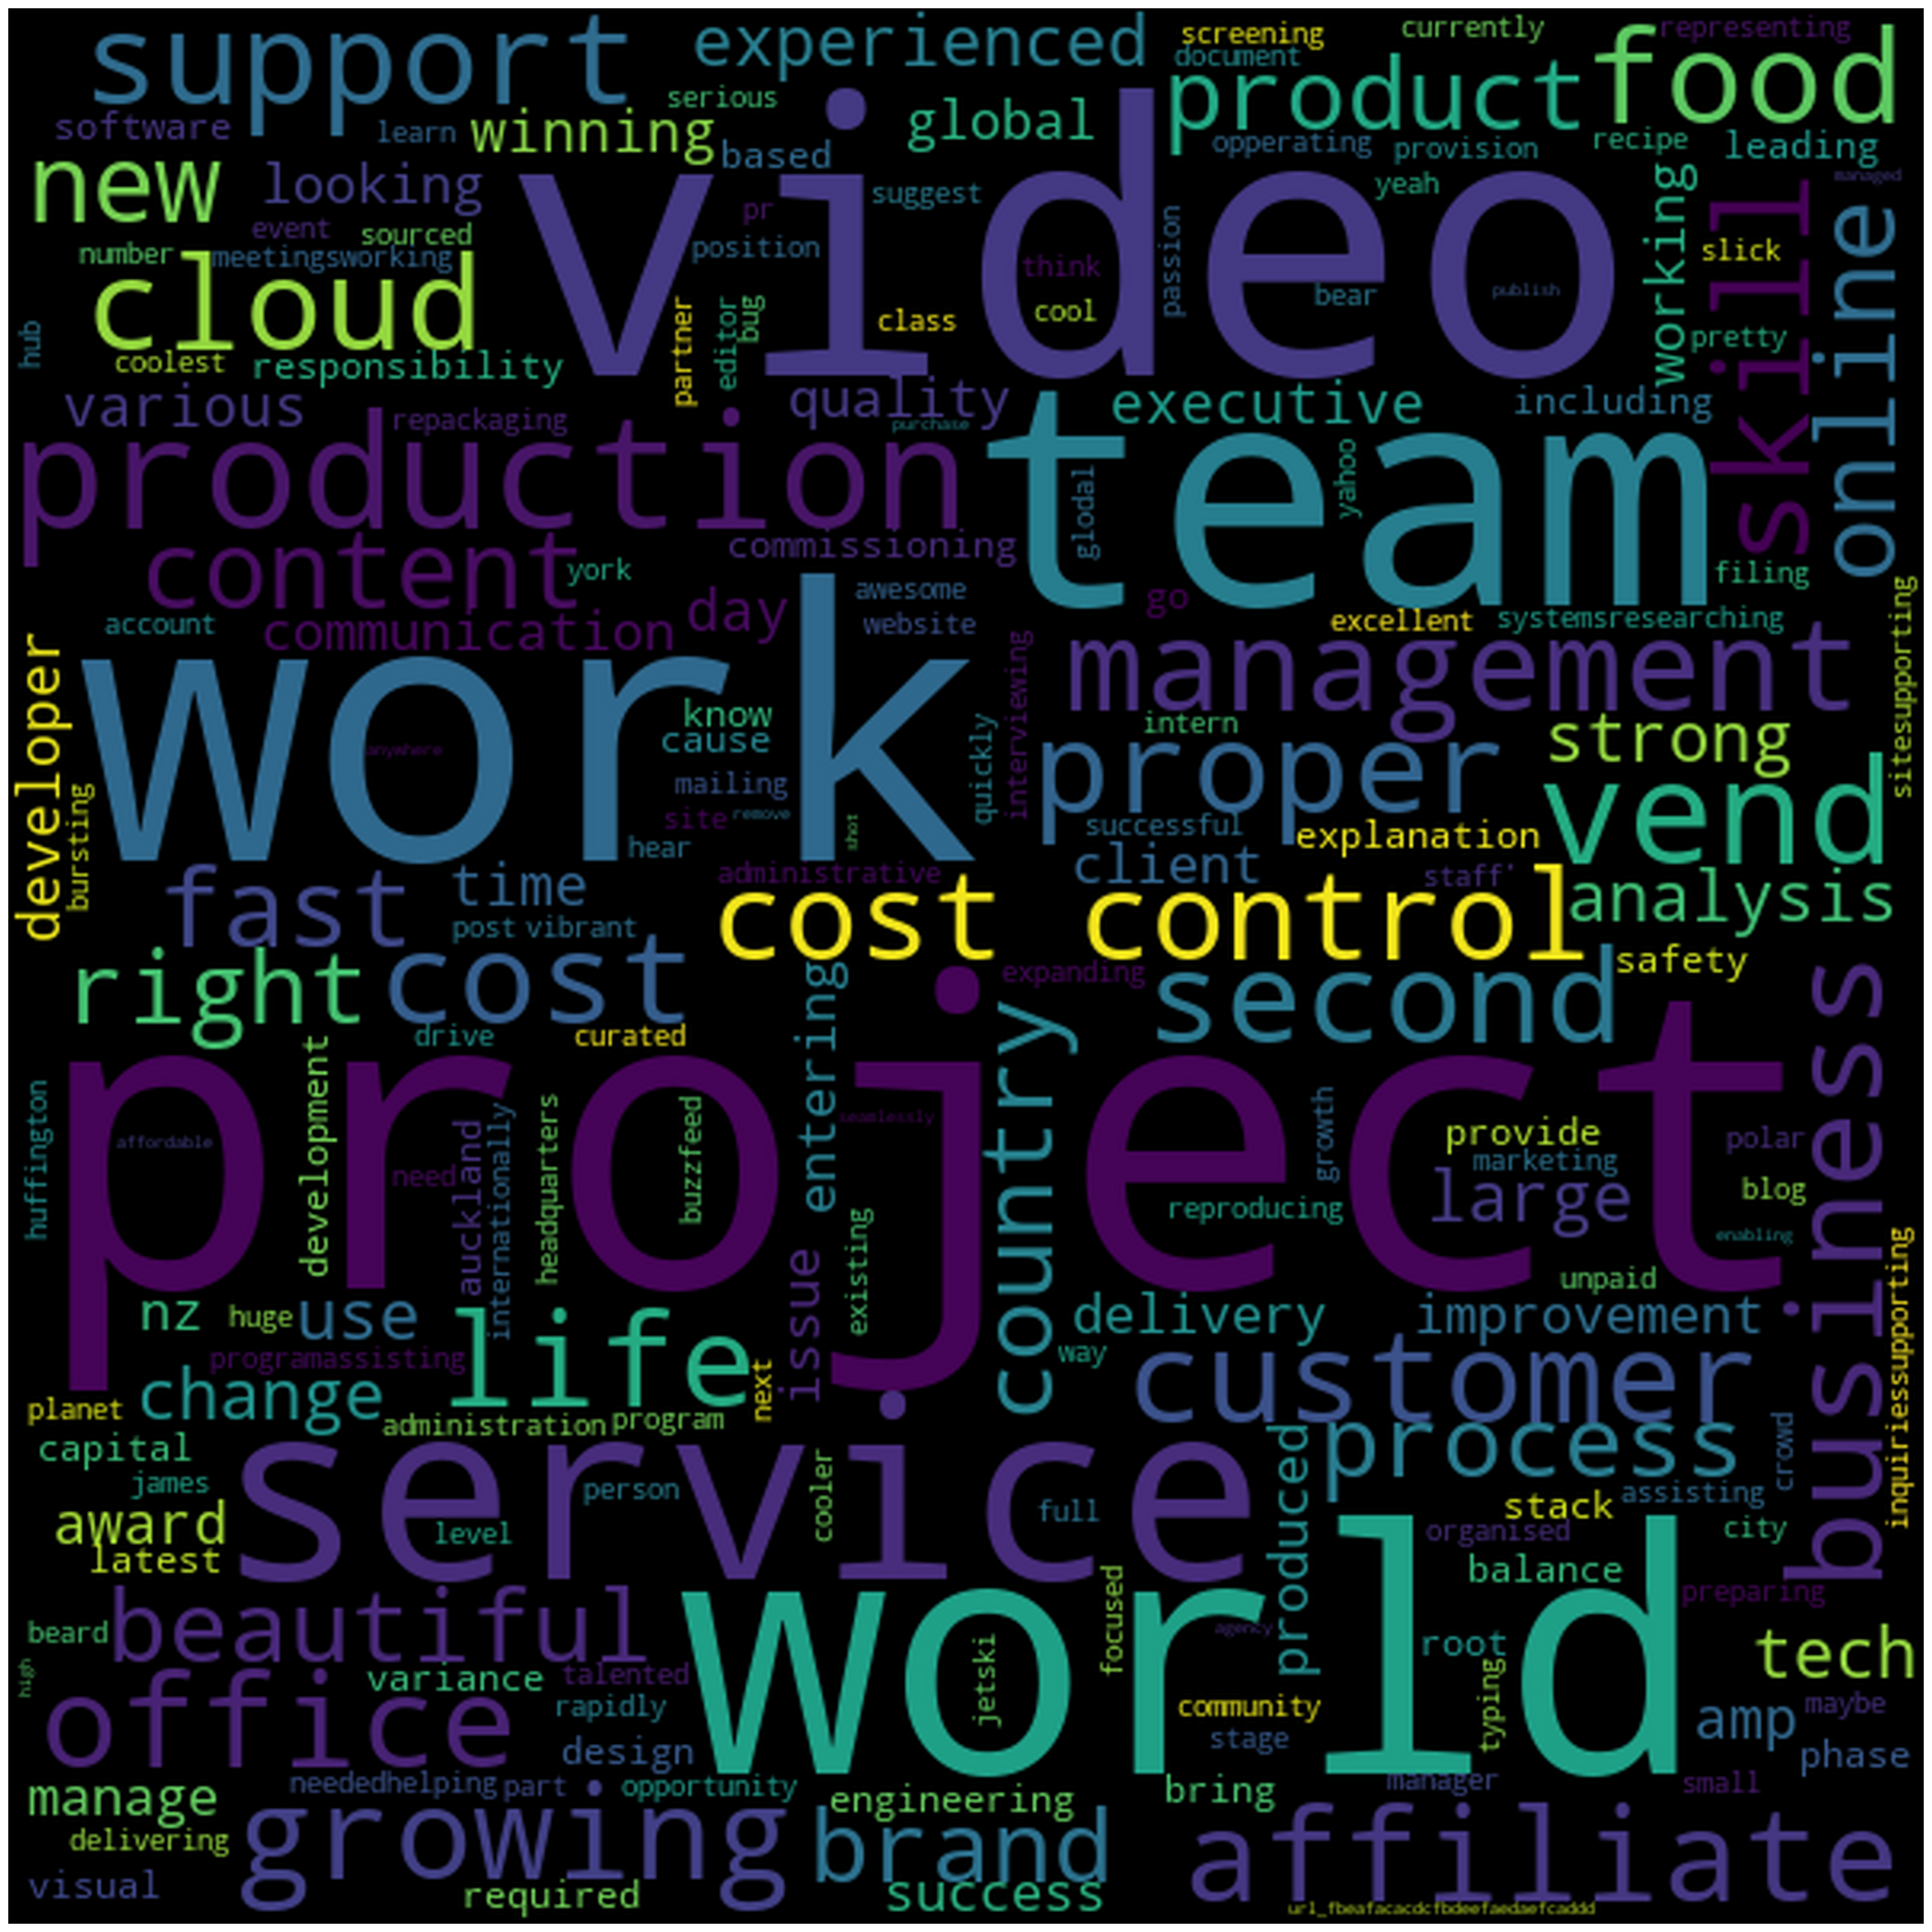

In [30]:
from nltk import ngrams
from wordcloud import WordCloud, STOPWORDS

def generate(string,ngram):
    n_grams=ngrams(word_tokenize(string),ngram)
    grams=[" ".join(val) for val in n_grams]
    return grams

real = df[df['fraudulent']==0]['description_processed'].values
cloud = WordCloud(width= 600, height= 600, stopwords= STOPWORDS, 
                      background_color='black').generate(str(real))

fig = plt.figure(figsize = (30, 30))
plt.imshow(cloud, interpolation= 'blackman')
plt.axis('off')
plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Real_Descr_WordCloud.png')


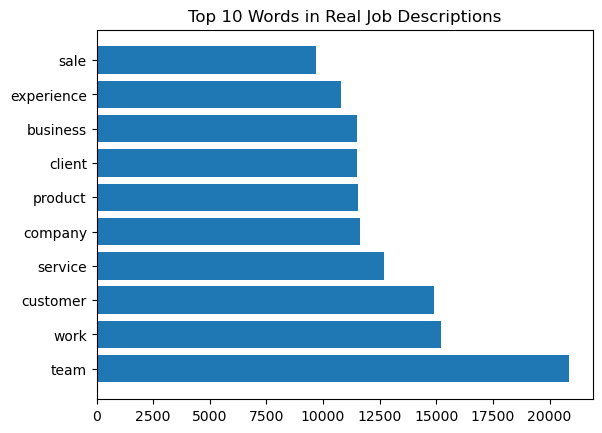

In [31]:
from collections import defaultdict
dict = defaultdict(int)

for text in df[df["fraudulent"]==0]["description_processed"]:
    for words in generate(text,1):
        dict[words]+=1
        
word_freq=pd.DataFrame(sorted(dict.items(),key=lambda x: x[1],reverse=True))
plt.barh(word_freq[0][:10], word_freq[1][:10])
plt.title('Top 10 Words in Real Job Descriptions')
plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Real_Descr_Top10Words.png')

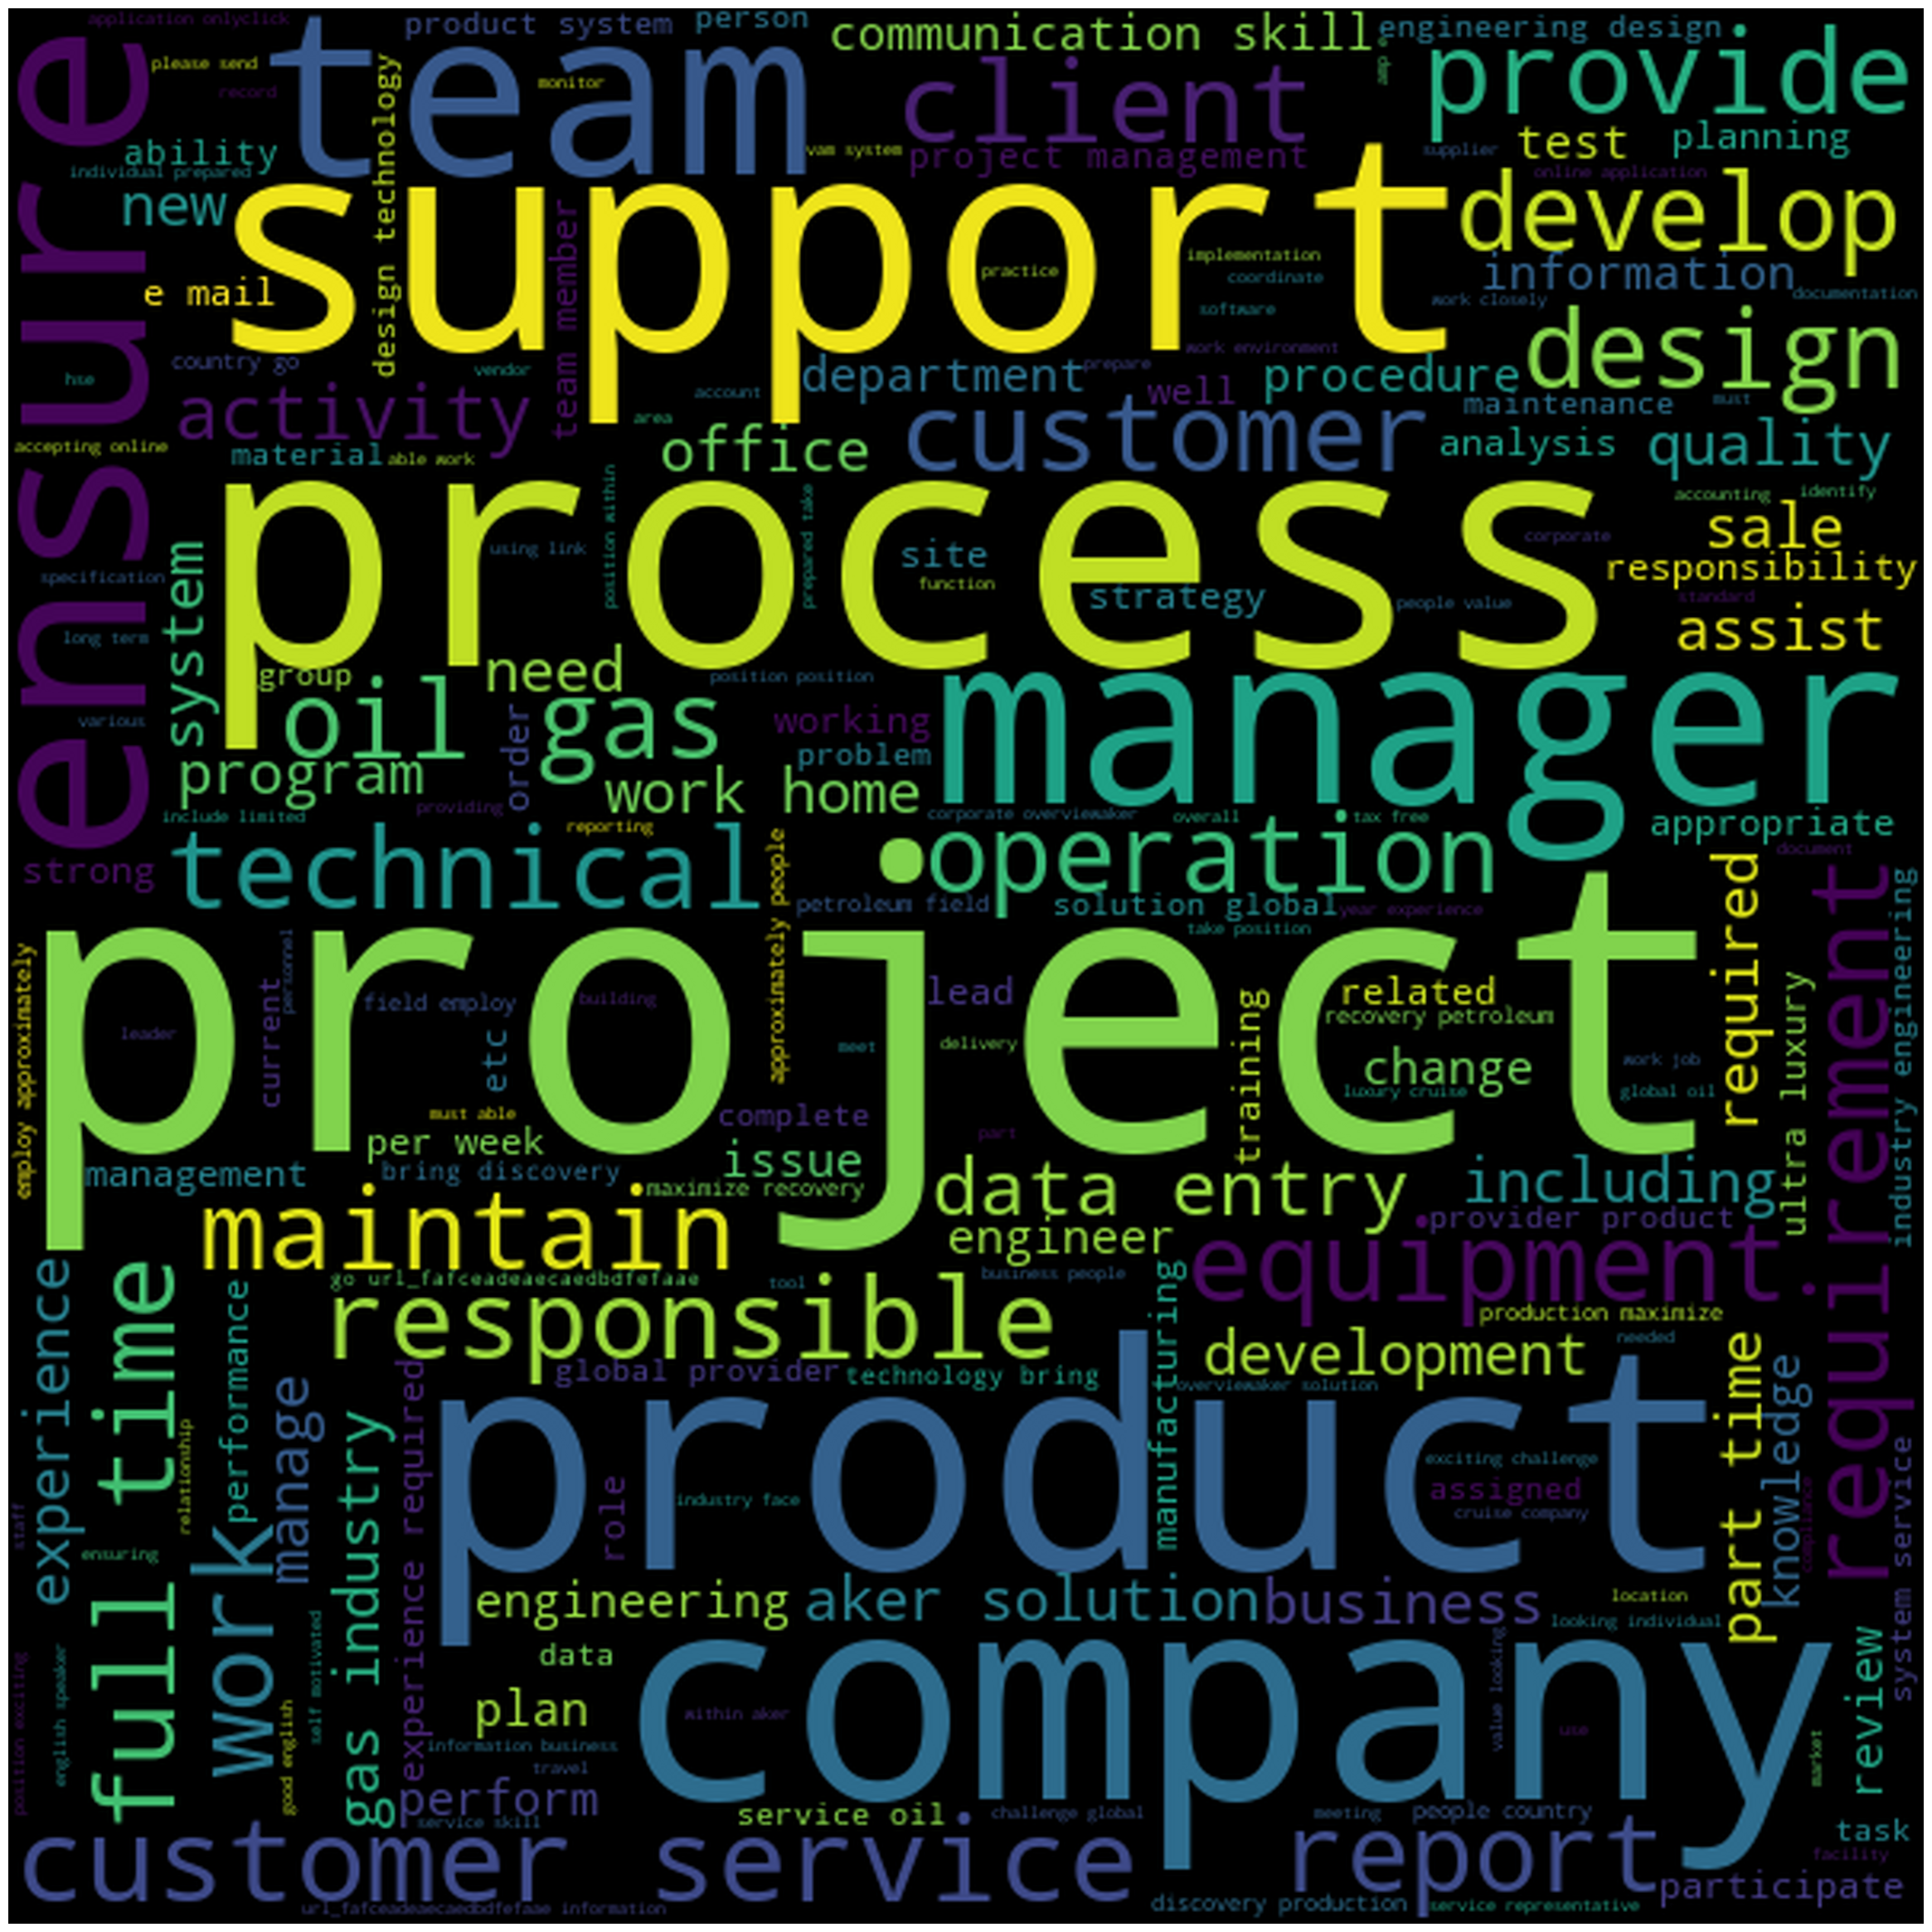

In [32]:
# Generate word cloud for fake job postings
fake = df[df['fraudulent']==1]['description_processed'].values
cloud = WordCloud(width= 600, height= 600, stopwords= STOPWORDS, 
                      background_color='black').generate(str(fake))

fig = plt.figure(figsize = (30, 30))
plt.imshow(cloud, interpolation= 'blackman')
plt.axis('off')
plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Fake_Descr_WordCloud.png')

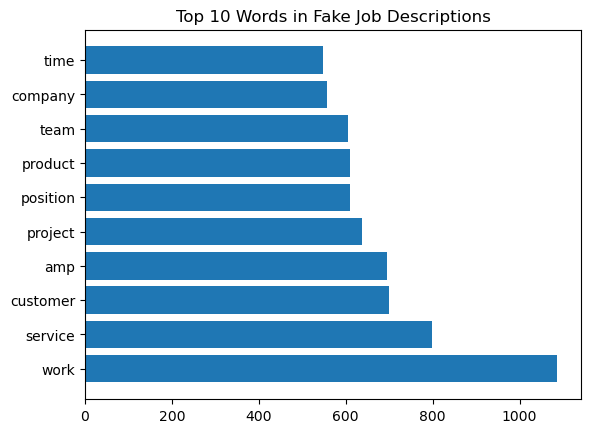

In [33]:
dict_2 = defaultdict(int)

for text in df[df["fraudulent"]==1]["description_processed"]:
    for words in generate(text,1):
        dict_2[words]+=1
        
word_freq_2=pd.DataFrame(sorted(dict_2.items(),key=lambda x: x[1],reverse=True))
plt.barh(word_freq_2[0][:10], word_freq_2[1][:10])
plt.title('Top 10 Words in Fake Job Descriptions')
plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Fake_Descr_Top10Words.png')

In [34]:
df.head()

title department  \
0                           Marketing Intern  Marketing   
1  Customer Service - Cloud Video Production    Success   
2    Commissioning Machinery Assistant (CMA)              
3          Account Executive - Washington DC      Sales   
4                        Bill Review Manager              

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                                 0   
1  What you will get from usThrough being part of...              0   
2                                                                 0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0                                       
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                                                           Marketing   
1                     Marketing and Advertising      Customer Service   
2                                                                       
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent                          title_processed  \
0           0                         marketing intern   
1           0  customer service cloud video production   
2           0    commissioning machinery assistant cma   
3           0          account executive washington dc   
4           0                      bill review manager   

                           company_profile_processed  \
0  food created groundbreaking award winning cook...   
1  second world cloud video production service se...   
2  valor service provides workforce solution meet...   
3  passion improving quality life geography heart...   
4  spotsource solution llc global human capital m...   

                               description_processed  \
0  food fast growing james beard award winning on...   
1  organised focused vibrant awesome passion cust...   
2  client located houston actively seeking experi...   
3  company esri environmental system research ins...   
4  job title itemization review managerlocation f...   

                              requirements_processed  \
0  experience content management system major plu...   
1  expect key responsibility communicate client s...   
2  implement pre commissioning commissioning proc...   
3  education bachelor master gi business administ...   
4  qualification rn license state texasdiploma ba...   

  

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      17880 non-null  object
 1   department                 17880 non-null  object
 2   company_profile            17880 non-null  object
 3   description                17880 non-null  object
 4   requirements               17880 non-null  object
 5   benefits                   17880 non-null  object
 6   telecommuting              17880 non-null  int64 
 7   has_company_logo           17880 non-null  int64 
 8   has_questions              17880 non-null  int64 
 9   employment_type            17880 non-null  object
 10  required_experience        17880 non-null  object
 11  required_education         17880 non-null  object
 12  industry                   17880 non-null  object
 13  function                   17880 non-null  object
 14  fraudu

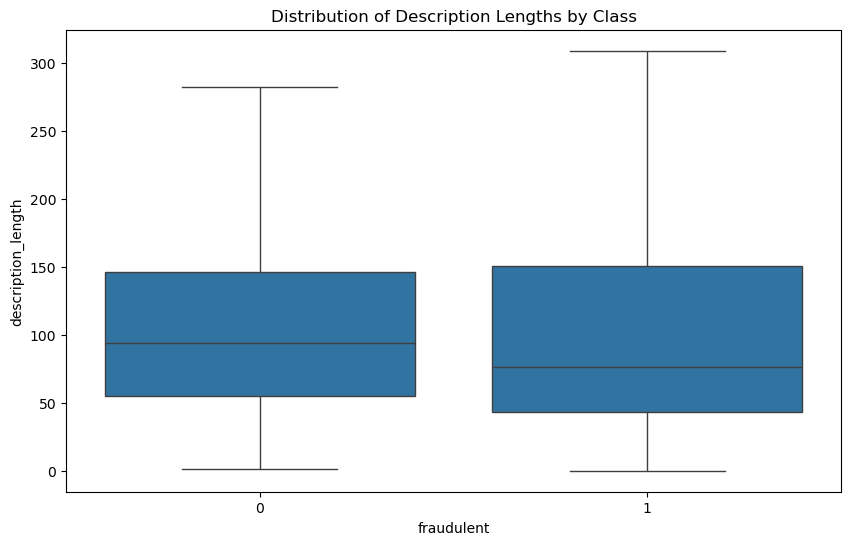

              count        mean        std  min   25%   50%     75%     max
fraudulent                                                                 
0           17014.0  111.048901  79.178497  1.0  55.0  94.0  146.00  1419.0
1             866.0  107.107390  92.679253  0.0  43.0  76.0  150.75   806.0


<Figure size 640x480 with 0 Axes>

In [36]:
# Analyze text lengths
df['description_length'] = df['description_processed'].str.split().str.len()

plt.figure(figsize=(10, 6))
sns.boxplot(x='fraudulent', y='description_length', data=df,showfliers=False)
plt.title('Distribution of Description Lengths by Class')
plt.show()

# Basic statistics
print(df.groupby('fraudulent')['description_length'].describe())
plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Descr_Lngth_ClassDist.png')

Getting most common words by class

In [37]:
import re
from collections import Counter

def check_special_chars(text_series):
    # Join all text
    all_text = ' '.join(text_series)
    # Find all non-alphabetic characters
    special_chars = re.findall(r'[^a-zA-Z\s]', all_text)
    return Counter(special_chars).most_common()

print("Special characters remaining in processed text:")
print(check_special_chars(df['description_processed']))

Special characters remaining in processed text:
[('_', 8945), ('α', 2876), ('ε', 2153), ('ι', 2022), ('τ', 1997), ('ο', 1886), ('ν', 1623), ('σ', 1277), ('ρ', 1145), ('μ', 1077), ('π', 1011), ('η', 1008), ('κ', 968), ('ς', 952), ('υ', 949), ('ί', 630), ('λ', 628), ('γ', 624), ('έ', 544), ('ά', 531), ('ό', 447), ('δ', 441), ('χ', 365), ('ή', 329), ('ω', 297), ('θ', 266), ('ύ', 235), ('ώ', 222), ('φ', 209), ('ζ', 125), ('β', 110), ('ξ', 105), ('é', 70), ('로', 61), ('ร', 54), ('고', 52), ('을', 48), ('น', 46), ('ś', 45), ('는', 45), ('니', 44), ('า', 44), ('이', 43), ('บ', 41), ('서', 40), ('다', 40), ('하', 39), ('å', 39), ('스', 39), ('ง', 39), ('ψ', 38), ('ł', 37), ('있', 36), ('일', 33), ('으', 33), ('อ', 33), ('에', 31), ('ม', 31), ('한', 30), ('ć', 30), ('무', 30), ('ก', 30), ('화', 28), ('ę', 28), ('ó', 27), ('버', 27), ('를', 27), ('의', 27), ('ø', 27), ('ï', 25), ('ą', 25), ('업', 25), ('เ', 25), ('ü', 24), ('즈', 24), ('인', 23), ('바', 23), ('â', 23), ('빌', 23), ('ä', 22), ('리', 22), ('면', 22), ('가',

There are still a lot of special characters remaining, a lot of which are non-english characters.

In [38]:
import unicodedata

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Normalize unicode characters
    text = unicodedata.normalize('NFKD', text)
    
    # Remove non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    return ' '.join(tokens)

# Reapply the improved preprocessing
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for column in text_columns:
    df[f'{column}_processed'] = df[column].apply(preprocess_text)

# Verify the cleaning worked
def check_cleaning(text_series):
    all_text = ' '.join(text_series)
    special_chars = re.findall(r'[^a-zA-Z\s]', all_text)
    remaining = Counter(special_chars).most_common()
    
    if remaining:
        print("Remaining special characters:")
        print(remaining)
    else:
        print("No special characters remaining!")

# Check the results
for column in text_columns:
    print(f"\nChecking {column}_processed:")
    check_cleaning(df[f'{column}_processed'])


Checking title_processed:
Remaining special characters:
[('_', 1)]

Checking company_profile_processed:
Remaining special characters:
[('_', 3827)]

Checking description_processed:
Remaining special characters:
[('_', 8945)]

Checking requirements_processed:
Remaining special characters:
[('_', 2901)]

Checking benefits_processed:
Remaining special characters:
[('_', 3683)]


In [39]:
# Check text lengths again
for column in text_columns:
    avg_length_before = df[column].str.len().mean()
    avg_length_after = df[f'{column}_processed'].str.len().mean()
    
    print(f"\n{column}:")
    print(f"Average length before: {avg_length_before:.2f}")
    print(f"Average length after: {avg_length_after:.2f}")
    print(f"Retention rate: {(avg_length_after/avg_length_before)*100:.2f}%")


title:
Average length before: 28.53
Average length after: 26.42
Retention rate: 92.59%

company_profile:
Average length before: 620.90
Average length after: 443.07
Retention rate: 71.36%

description:
Average length before: 1218.00
Average length after: 898.19
Retention rate: 73.74%



requirements:
Average length before: 590.13
Average length after: 464.45
Retention rate: 78.70%

benefits:
Average length before: 208.90
Average length after: 153.40
Retention rate: 73.43%


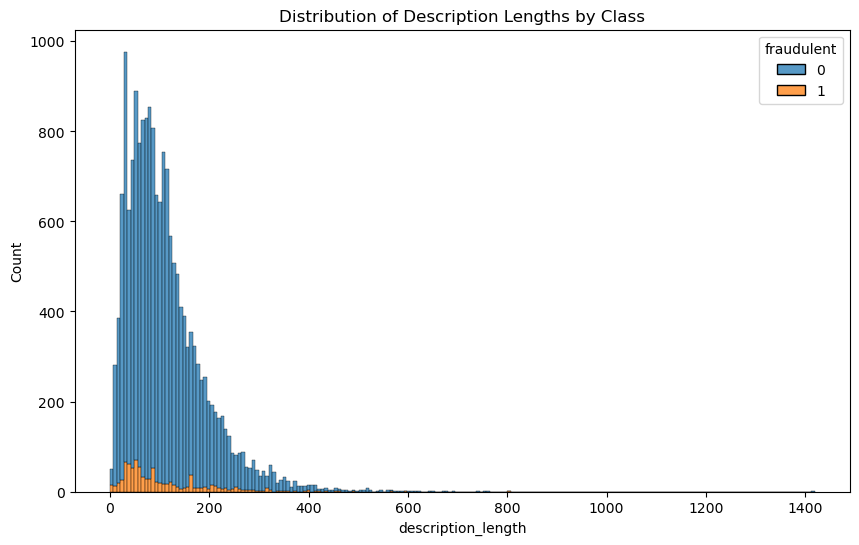

<Figure size 640x480 with 0 Axes>

In [40]:
# Visualize the difference between the length of description for fraudulent and real job postings
plt.figure(figsize=(10, 6))
sns.histplot(df, x='description_length', hue='fraudulent', multiple='stack')
plt.title('Distribution of Description Lengths by Class')
plt.show()
plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Descr_Lngth_ClassDist.png')


Fradulent job postings have shorter descriptions than real job postings.

# Creating new features

In [41]:
import spacy
from textblob import TextBlob
import re
from sklearn.base import BaseEstimator, TransformerMixin

# New feature extraction functions
def extract_text_patterns(text):
    if not isinstance(text, str) or len(text.strip()) == 0:  # Check for empty strings 
        return {
            'avg_word_length': 0,
            'caps_ratio': 0,
            'url_count': 0,
            'email_pattern': 0,
            'money_pattern': 0
        }
    # Calculate average word length (with check for empty word list)
    words = text.split()
    avg_word_length = np.mean([len(word) for word in words]) if words else 0
    
    # Calculate caps ratio (with check for zero length)
    text_length = len(text)
    caps_ratio = sum(1 for c in text if c.isupper()) / text_length if text_length > 0 else 0

    return {
        'avg_word_length': avg_word_length,
        'caps_ratio': caps_ratio,
        'url_count': text.count('http'),
        'email_pattern': len(re.findall(r'[\w\.-]+@[\w\.-]+', text)),
        'money_pattern': len(re.findall(r'[\$£€]\d+', text))
    }

def extract_fraud_indicators(text):
    if not isinstance(text, str):
        return {
            'urgency_score': 0,
            'guarantee_score': 0,
            'pressure_score': 0,
            'excessive_punctuation': 0,
            'all_caps_words': 0
        }
    # Common fraud patterns
    urgency_words = ['urgent', 'immediate', 'limited time', 'act now']
    guarantee_words = ['guarantee', 'guaranteed', 'promise', 'risk-free']
    pressure_words = ['only today', 'last chance', 'exclusive offer']
    
    return {
        'urgency_score': sum(1 for word in urgency_words if word in text.lower()),
        'guarantee_score': sum(1 for word in guarantee_words if word in text.lower()),
        'pressure_score': sum(1 for word in pressure_words if word in text.lower()),
        'excessive_punctuation': len(re.findall(r'[!?]{2,}', text)),
        'all_caps_words': len(re.findall(r'\b[A-Z]{2,}\b', text))
    }

# Add features to dataframe
# Add print statements to debug
def add_sophisticated_features(df):
    text_columns = ['title_processed', 'company_profile_processed', 
                   'description_processed', 'requirements_processed', 
                   'benefits_processed']
    
    print("Processing columns:", text_columns)
    print("Sample of first text column:", df[text_columns[0]].head())
    
    for column in text_columns:
        print(f"\nProcessing {column}")
        
        # Extract fraud indicators
        fraud_features = df[column].apply(extract_fraud_indicators)
        print(f"Fraud features extracted for {column}:", list(fraud_features.iloc[0].keys()))
        
        fraud_df = pd.DataFrame(fraud_features.tolist())
        fraud_df.columns = [f'{column}_{col}' for col in fraud_df.columns]
        
        # Add to main dataframe
        df = pd.concat([df, fraud_df], axis=1)
        
    print("\nFinal columns added:", [col for col in df.columns if 'red_flags' in col])
    return df

df = add_sophisticated_features(df)
df.head()


Processing columns: ['title_processed', 'company_profile_processed', 'description_processed', 'requirements_processed', 'benefits_processed']
Sample of first text column: 0                           marketing intern
1    customer service cloud video production
2      commissioning machinery assistant cma
3            account executive washington dc
4                        bill review manager
Name: title_processed, dtype: object

Processing title_processed
Fraud features extracted for title_processed: ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punctuation', 'all_caps_words']

Processing company_profile_processed
Fraud features extracted for company_profile_processed: ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punctuation', 'all_caps_words']

Processing description_processed
Fraud features extracted for description_processed: ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punctuation', 'all_caps_words']

Processing require

title department  \
0                           Marketing Intern  Marketing   
1  Customer Service - Cloud Video Production    Success   
2    Commissioning Machinery Assistant (CMA)              
3          Account Executive - Washington DC      Sales   
4                        Bill Review Manager              

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                                 0   
1  What you will get from usThrough being part of...              0   
2                                                                 0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type  ...  \
0                 1              0           Other  ...   
1                 1              0       Full-time  ...   
2                 1              0                  ...   
3                 1              0       Full-time  ...   
4                 1              1       Full-time  ...   

  requirements_processed_urgency_score requirements_processed_guarantee_score  \
0                                    0                                      0   
1                                    0                                      0   
2                                    0                                      0   
3                                    0                                      0   
4                                    0                                      0   

  requirements_processed_pressure_score  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

  requirements_processed_excessive_punctuation  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   requirements_processed_all_caps_words benefits_processed_urgency_score  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   

  benefits_processed_guarantee_score benefits_processed_pressure_score  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4          

# Text Vectorization

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [43]:
df.head()

title department  \
0                           Marketing Intern  Marketing   
1  Customer Service - Cloud Video Production    Success   
2    Commissioning Machinery Assistant (CMA)              
3          Account Executive - Washington DC      Sales   
4                        Bill Review Manager              

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                                 0   
1  What you will get from usThrough being part of...              0   
2                                                                 0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type  ...  \
0                 1              0           Other  ...   
1                 1              0       Full-time  ...   
2                 1              0                  ...   
3                 1              0       Full-time  ...   
4                 1              1       Full-time  ...   

  requirements_processed_urgency_score requirements_processed_guarantee_score  \
0                                    0                                      0   
1                                    0                                      0   
2                                    0                                      0   
3                                    0                                      0   
4                                    0                                      0   

  requirements_processed_pressure_score  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

  requirements_processed_excessive_punctuation  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   requirements_processed_all_caps_words benefits_processed_urgency_score  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   

  benefits_processed_guarantee_score benefits_processed_pressure_score  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4          

In [44]:
# Combine relevant text columns for vectorization
df['combined_text']= (df['title_processed'] + ' ' + 
                      df['company_profile_processed'] + ' ' + 
                      df['description_processed'] + ' ' + 
                      df['requirements_processed'] + ' ' + 
                      df['benefits_processed'])

vectorizer = TfidfVectorizer(min_df = 0.01, 
                             max_df = 0.95, 
                             ngram_range=(1,3), 
                             stop_words='english')

X_tfidf = vectorizer.fit_transform(df['combined_text'])

vec_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
vec_tfidf.head()

ability  ability build  ability communicate  ability effectively  \
0  0.000000            0.0                  0.0                  0.0   
1  0.011413            0.0                  0.0                  0.0   
2  0.000000            0.0                  0.0                  0.0   
3  0.019763            0.0                  0.0                  0.0   
4  0.000000            0.0                  0.0                  0.0   

   ability learn  ability manage  ability multi  ability multi task  \
0            0.0             0.0            0.0                 0.0   
1            0.0             0.0            0.0                 0.0   
2            0.0             0.0            0.0                 0.0   
3            0.0             0.0            0.0                 0.0   
4            0.0             0.0            0.0                 0.0   

   ability prioritize  ability work  ...  youll  youll need  youll work  \
0                 0.0           0.0  ...    0.0         0.0         0.0   
1                 0.0           0.0  ...    0.0         0.0         0.0   
2                 0.0           0.0  ...    0.0         0.0         0.0   
3                 0.0           0.0  ...    0.0         0.0         0.0   
4                 0.0           0.0  ...    0.0         0.0         0.0   

   young  youre  youre looking  youve   yr  zealand  zone  
0    0.0    0.0            0.0    0.0  0.0      0.0   0.0  
1    0.0    0.0            0.0    0.0  0.0      0.0   0.0  
2    0.0    0.0            0.0    0.0  0.0      0.0   0.0  
3    0.0    0.0            0.0    0.0  0.0      0.0   0.0  
4    0.0    0.0            0.0    0.0  0.0      0.0   0.0  

[5 rows x 4248 columns]

# Topic Modeling

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Document-term matrix using CountVectorizer
count_vectorizer = CountVectorizer(min_df=0.01, max_df=0.95)
doc_term_matrix = count_vectorizer.fit_transform(df['combined_text'])

# FLDA model
# n_components represents the number of topics you want to extract
n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, 
                                     random_state=42,
                                     learning_method='batch')
lda_output = lda_model.fit_transform(doc_term_matrix)

# Display the top words for each topic
def print_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Display top 10 words for each topic
print_topics(lda_model, count_vectorizer.get_feature_names_out(), 10)

# Add topic distributions to original dataframe
topic_names = [f"Topic {i+1}" for i in range(n_topics)]
doc_topics = pd.DataFrame(lda_output, columns=topic_names)

# Get dominant topic for each document
df['dominant_topic'] = doc_topics.idxmax(axis=1)


Topic 1: company, finance, financial, service, benefit, employment, position, year, well, credit
Topic 2: marketing, medium, digital, social, content, brand, campaign, online, experience, new
Topic 3: business, management, client, project, team, experience, skill, work, service, company
Topic 4: experience, job, technical, system, engineering, year, website, amp, data, manufacturing
Topic 5: experience, product, design, development, software, technology, service, application, team, user
Topic 6: student, job, teacher, abroad, get, loan, teaching, required, experience, title
Topic 7: customer, service, work, process, business, document, communication, solution, required, mail
Topic 8: sale, customer, product, service, business, work, career, role, candidate, training
Topic 9: service, work, home, time, care, must, experience, position, customer, hour
Topic 10: team, work, experience, people, new, working, company, looking, product, want


In [46]:
df.shape

(17880, 48)

# Dimensionality reduction with SVD

In [47]:


X_tfidf.shape

(17880, 4248)

In [48]:
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD to sparse TF-IDF matrix
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(X_tfidf)
print(tfidf_reduced.shape)
print("Explained Variance:", sum(svd.explained_variance_ratio_))

(17880, 100)
Explained Variance: 0.3954593408613544


SVD is not able to explain enough variance so we'll use other techniques

## Putting together processed features

In [49]:
# Add sophisticated features to processed text columns
df = add_sophisticated_features(df)
df.head()

Processing columns: ['title_processed', 'company_profile_processed', 'description_processed', 'requirements_processed', 'benefits_processed']
Sample of first text column: 0                           marketing intern
1    customer service cloud video production
2      commissioning machinery assistant cma
3            account executive washington dc
4                        bill review manager
Name: title_processed, dtype: object

Processing title_processed
Fraud features extracted for title_processed: ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punctuation', 'all_caps_words']

Processing company_profile_processed
Fraud features extracted for company_profile_processed: ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punctuation', 'all_caps_words']

Processing description_processed
Fraud features extracted for description_processed: ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punctuation', 'all_caps_words']

Processing require

title department  \
0                           Marketing Intern  Marketing   
1  Customer Service - Cloud Video Production    Success   
2    Commissioning Machinery Assistant (CMA)              
3          Account Executive - Washington DC      Sales   
4                        Bill Review Manager              

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                                 0   
1  What you will get from usThrough being part of...              0   
2                                                                 0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type  ...  \
0                 1              0           Other  ...   
1                 1              0       Full-time  ...   
2                 1              0                  ...   
3                 1              0       Full-time  ...   
4                 1              1       Full-time  ...   

  requirements_processed_urgency_score requirements_processed_guarantee_score  \
0                                    0                                      0   
1                                    0                                      0   
2                                    0                                      0   
3                                    0                                      0   
4                                    0                                      0   

  requirements_processed_pressure_score  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

  requirements_processed_excessive_punctuation  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   requirements_processed_all_caps_words benefits_processed_urgency_score  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   

  benefits_processed_guarantee_score benefits_processed_pressure_score  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4          

In [50]:
# Get all the sophisticated features that were actually added
sophisticated_features = [col for col in df.columns 
                        if any(x in col for x in [
                            'urgency_score',
                            'guarantee_score', 
                            'pressure_score',
                            'excessive_punctuation',
                            'all_caps_words'
                        ])]
sophisticated_features


['title_processed_urgency_score',
 'title_processed_guarantee_score',
 'title_processed_pressure_score',
 'title_processed_excessive_punctuation',
 'title_processed_all_caps_words',
 'company_profile_processed_urgency_score',
 'company_profile_processed_guarantee_score',
 'company_profile_processed_pressure_score',
 'company_profile_processed_excessive_punctuation',
 'company_profile_processed_all_caps_words',
 'description_processed_urgency_score',
 'description_processed_guarantee_score',
 'description_processed_pressure_score',
 'description_processed_excessive_punctuation',
 'description_processed_all_caps_words',
 'requirements_processed_urgency_score',
 'requirements_processed_guarantee_score',
 'requirements_processed_pressure_score',
 'requirements_processed_excessive_punctuation',
 'requirements_processed_all_caps_words',
 'benefits_processed_urgency_score',
 'benefits_processed_guarantee_score',
 'benefits_processed_pressure_score',
 'benefits_processed_excessive_punctuation'

In [51]:
# Create cleaned_df with only processed features
columns_to_keep = [
    'description_length',
    'dominant_topic',
    'telecommuting',
    'has_company_logo',
    'has_questions',
    'fraudulent'
]

# 3. Extend the list with sophisticated features
columns_to_keep.extend(sophisticated_features)

# 4. Create cleaned_df with all these columns
cleaned_df = df[columns_to_keep]


# 3. Add TF-IDF features
cleaned_df = pd.concat([cleaned_df,vec_tfidf], axis=1)

# 4. Verify the shape and features
print("Cleaned dataframe shape:", cleaned_df.shape)
print("\nColumns in cleaned_df:")
print("Original features:", columns_to_keep[:6])
print("Sophisticated features:", columns_to_keep[6:])
print("Number of TF-IDF features:", vec_tfidf.shape[1])

Cleaned dataframe shape: (17880, 4354)

Columns in cleaned_df:
Original features: ['description_length', 'dominant_topic', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']
Sophisticated features: ['title_processed_urgency_score', 'title_processed_guarantee_score', 'title_processed_pressure_score', 'title_processed_excessive_punctuation', 'title_processed_all_caps_words', 'company_profile_processed_urgency_score', 'company_profile_processed_guarantee_score', 'company_profile_processed_pressure_score', 'company_profile_processed_excessive_punctuation', 'company_profile_processed_all_caps_words', 'description_processed_urgency_score', 'description_processed_guarantee_score', 'description_processed_pressure_score', 'description_processed_excessive_punctuation', 'description_processed_all_caps_words', 'requirements_processed_urgency_score', 'requirements_processed_guarantee_score', 'requirements_processed_pressure_score', 'requirements_processed_excessive_punctuation', 'r

In [52]:
cleaned_df.to_csv('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Data/Cleaned_Processed_Data_2.csv', index=False)

# Creating TextProcessor Class for Streamlit App

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import re
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


class TextProcessor:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(
            min_df=0.01,
            max_df=0.95,
            ngram_range=(1,3),
            stop_words='english',
            max_features=1000
        )
        # Store the vectorizer as instance variable so it can be reused
        self.is_fitted = False
# Initialize NLTK components
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        
        # Download required NLTK data
        # Add try/except for each download separately
        nltk_resources = ['punkt', 'stopwords', 'wordnet', 'omw-1.4']
        for resource in nltk_resources:
            try:
                nltk.download(resource, quiet=True)
            except Exception as e:
                print(f"Warning: Failed to download {resource}: {str(e)}")

    # Initialize fraud detection word lists
        self.urgency_words = ['urgent', 'immediate', 'limited time', 'act now']
        self.guarantee_words = ['guarantee', 'guaranteed', 'promise', 'risk-free']
        self.pressure_words = ['only today', 'last chance', 'exclusive offer']
        
        # Add compiled regex patterns as class attributes
        self.email_pattern = re.compile(r'[\w\.-]+@[\w\.-]+')
        self.money_pattern = re.compile(r'[\$£€]\d+')
        self.punctuation_pattern = re.compile(r'[!?]{2,}')
        self.caps_pattern = re.compile(r'\b[A-Z]{2,}\b')
        self.feature_prefixes = {
            'pattern': ['avg_word_length', 'caps_ratio', 'url_count', 'email_pattern', 'money_pattern'],
            'fraud': ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punctuation', 'all_caps_words']
        }
        
    # Add numerical feature names
        self.numerical_features = [
            'telecommuting',
            'has_company_logo', 
            'has_questions'
        ]

    def preprocess_text(self, text):
        """
        Preprocesses text using the same steps as in the notebook.
        
        Args:
            text (str): Input text to preprocess
            
        Returns:
            str: Preprocessed text
        """
        MAX_TEXT_LENGTH = 1000000  # 1MB
        if not isinstance(text, str):
            return ''
        if len(text) > MAX_TEXT_LENGTH:
            raise ValueError(f"Input text exceeds maximum length of {MAX_TEXT_LENGTH} characters")
        
        # Convert to lowercase
        text = text.lower()
        
        # Normalize unicode characters
        text = unicodedata.normalize('NFKD', text)
        
        # Remove non-ASCII characters
        text = text.encode('ascii', 'ignore').decode('ascii')
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Remove special characters and digits
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', '', text)
        
        # Remove extra whitespace
        text = ' '.join(text.split())
        
        # Tokenization
        tokens = word_tokenize(text)
        
        # Remove stopwords
        tokens = [token for token in tokens if token not in self.stop_words]
        
        # Lemmatization
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
        
        # Join tokens back into text
        return ' '.join(tokens)
    
    
    def combine_text_fields(self, text_dict):
        """
        Combines multiple text fields into a single string.
        
        Args:
            text_dict (dict): Dictionary containing text fields with keys:
                - title
                - company_profile
                - description
                - requirements
                - benefits
        
        Returns:
            str: Combined text string
        """
        # Handle missing fields gracefully by using get() with empty string default
        combined = ' '.join([
            text_dict.get('title', ''),
            text_dict.get('company_profile', ''),
            text_dict.get('description', ''),
            text_dict.get('requirements', ''),
            text_dict.get('benefits', '')
        ])
        return combined.strip()
    
    def extract_text_patterns(self, text):
        """
        Extracts basic text patterns and metrics.
        
        Args:
            text (str): Input text
            
        Returns:
            dict: Dictionary of text pattern features
        """
        if not isinstance(text, str) or len(text.strip()) == 0:
            return {
                'avg_word_length': 0,
                'caps_ratio': 0,
                'url_count': 0,
                'email_pattern': 0,
                'money_pattern': 0
            }
        
        # Calculate average word length
        words = text.split()
        avg_word_length = np.mean([len(word) for word in words]) if words else 0
        
        # Calculate caps ratio
        text_length = len(text)
        caps_ratio = sum(1 for c in text if c.isupper()) / text_length if text_length > 0 else 0

        return {
            'avg_word_length': avg_word_length,
            'caps_ratio': caps_ratio,
            'url_count': text.count('http'),
            'email_pattern': len(re.findall(r'[\w\.-]+@[\w\.-]+', text)),
            'money_pattern': len(re.findall(r'[\$£€]\d+', text))
        }

    def extract_fraud_indicators(self, text):
        """
        Extracts indicators that might suggest fraudulent content.
        
        Args:
            text (str): Input text
            
        Returns:
            dict: Dictionary of fraud indicator features
        """
        if not isinstance(text, str):
            return {
                'urgency_score': 0,
                'guarantee_score': 0,
                'pressure_score': 0,
                'excessive_punctuation': 0,
                'all_caps_words': 0
            }
        
        text_lower = text.lower()
        return {
            'urgency_score': sum(1 for word in self.urgency_words if word in text_lower),
            'guarantee_score': sum(1 for word in self.guarantee_words if word in text_lower),
            'pressure_score': sum(1 for word in self.pressure_words if word in text_lower),
            'excessive_punctuation': len(re.findall(r'[!?]{2,}', text)),
            'all_caps_words': len(re.findall(r'\b[A-Z]{2,}\b', text))
        }

    def extract_all_features(self, input_dict):
        """
        Extracts all features from the input fields, including both text and numerical.
        
        Args:
            input_dict (dict): Dictionary containing:
                Text fields:
                    - title
                    - company_profile
                    - description
                    - requirements
                    - benefits
                Numerical fields:
                    - telecommuting (0/1)
                    - has_company_logo (0/1)
                    - has_questions (0/1)
            
        Returns:
            pandas.DataFrame: DataFrame containing all extracted features
        """
        # Validate input
        if not isinstance(input_dict, dict):
            raise ValueError("Input must be a dictionary")
        # Add validation for required fields
        required_fields = ['title', 'description']  # minimum required fields
        missing_fields = [field for field in required_fields if not input_dict.get(field)]
        if missing_fields:
            raise ValueError(f"Missing required fields: {missing_fields}")
        
        # First get text features
        combined_text = self.combine_text_fields(input_dict)
        
        # Ensure vectorizer is fitted before transform
        if not self.is_fitted:
            raise ValueError("TextProcessor must be fitted before extracting features")
            
        tfidf_features = self.transform([combined_text])
        
        features = {}
        
        # Process text fields
        text_fields = ['title', 'company_profile', 'description', 'requirements', 'benefits']
        for field in text_fields:
            text = input_dict.get(field, '')
            preprocessed_text = self.preprocess_text(text)
            
            # Add text patterns
            patterns = self.extract_text_patterns(text)
            for key, value in patterns.items():
                features[f'{field}_{key}'] = value
            
            # Add fraud indicators
            indicators = self.extract_fraud_indicators(text)
            for key, value in indicators.items():
                features[f'{field}_{key}'] = value
            
            # Add length features
            features[f'{field}_length'] = len(preprocessed_text.split())
        
        # Add numerical features
        for feature in self.numerical_features:
            features[feature] = input_dict.get(feature, 0)
        
        # Combine all features into a single DataFrame
        features_df = pd.DataFrame([features])
        return pd.concat([features_df, tfidf_features], axis=1)

    def process_job_posting(self, input_dict):
        """
        Process a complete job posting and return all features.
        
        Args:
            input_dict (dict): Dictionary containing:
                Text fields:
                    - title
                    - company_profile
                    - description
                    - requirements
                    - benefits
                Numerical fields:
                    - telecommuting (0/1)
                    - has_company_logo (0/1)
                    - has_questions (0/1)
            
        Returns:
            pandas.DataFrame: DataFrame containing all extracted features
        """
        if not self.is_fitted:
            raise ValueError("TextProcessor must be fitted before processing job postings")
            
        return self.extract_all_features(input_dict)
    
    def fit_transform(self, text_data):
        """
        Fits the vectorizer and transforms the input text data.
        
        Args:
            text_data (list): List of text strings to process
        
        Returns:
            pandas.DataFrame: TF-IDF features as a dataframe
        """
        
        # Convert input to list if it's a single string
        if isinstance(text_data, str):
            text_data = [text_data]
        try:
            tfidf_matrix = self.vectorizer.fit_transform(text_data)
            self.is_fitted = True
        except Exception as e:
            self.is_fitted = False
            raise ValueError(f"Failed to fit vectorizer: {str(e)}")
        
        # Convert to dataframe with feature names
        return pd.DataFrame(
            tfidf_matrix.toarray(),
            columns=self.vectorizer.get_feature_names_out()
        )

    def transform(self, text_data):
        """
        Transforms new text data using the fitted vectorizer.
        
        Args:
            text_data (list): List of text strings to process
        
        Returns:
            pandas.DataFrame: TF-IDF features as a dataframe
        """
        if not self.is_fitted:
            raise ValueError("TextProcessor must be fitted before transform can be called")
            
        # Convert input to list if it's a single string
        if isinstance(text_data, str):
            text_data = [text_data]
            
        # Transform the text data
        tfidf_matrix = self.vectorizer.transform(text_data)
        
        # Convert to dataframe with feature names
        return pd.DataFrame(
            tfidf_matrix.toarray(),
            columns=self.vectorizer.get_feature_names_out()
        )